In [1]:
import numpy as np
import pandas as pd
from scipy.signal import savgol_filter
from pykrx import stock
import matplotlib.pyplot as plt
import time
plt.rcParams['font.family'] = 'Malgun Gothic'

In [5]:
"""
분석 기간
"""
start_year = '2012'
end_year = '2021'

In [3]:
"""
금호석유
"""
code = '011780'

In [6]:
"""
매년 5월 31에 제일 가까운 영업일의 배당금 가져 오기
"""
dps_list = []
for year in range(int(start_year)+1, int(end_year)+2):
    #print(year)
    last_business_day_of_may = stock.get_nearest_business_day_in_a_week(str(year)+'0531')
    print(last_business_day_of_may)
    df_annual_f = stock.get_market_fundamental(last_business_day_of_may, last_business_day_of_may, code)
    display(df_annual_f)
    dps_list.append(df_annual_f.DPS.values[0])
    time.sleep(1)

20130531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2013-05-31,46211,19.24,2.06,4959,2.1,2000


20140530


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2014-05-30,44031,0.0,1.84,0,1.85,1500


20150529


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2015-05-29,46561,22.13,1.69,3557,1.91,1500


20160531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2016-05-31,46474,14.99,1.37,4257,1.25,800


20170531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2017-05-31,48363,29.87,1.62,2618,1.02,800


20180531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2018-05-31,55019,13.73,1.91,7647,0.95,1000


20190531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2019-05-31,70088,5.44,1.37,17597,1.41,1350


20200529


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2020-05-29,78488,6.72,0.9,10549,2.12,1500


20210531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2021-05-31,94002,11.09,2.46,20881,1.81,4200


20220531


,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2022-05-31,181037,2.27,0.88,70433,6.25,10000


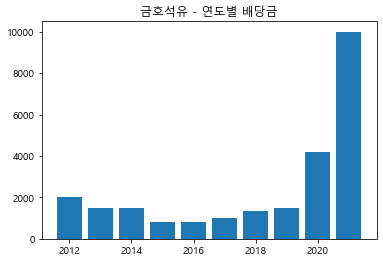

In [19]:
name = stock.get_market_ticker_name(code)

plt.title(f'{name} - 연도별 배당금')
plt.bar(range(int(start_year), int(end_year)+1), dps_list)
plt.show()

배당 성장 연수와 배당 성장률 구하기

In [14]:
def getActualDivGrowth(divs):
    div_history = divs.copy()
    div_history.reverse()
    div_growth_list = []
    for div_cur, div_before in zip(div_history, div_history[1:]):
        print(f'div_cur = {div_cur}, div_before = {div_before}')
        if div_before == 0:
            #print('div_before is 0')
            break;

        if div_cur >= div_before:
            div_growth_list.append(div_cur)
        else:
            #print('div_before is more than div cur')
            div_growth_list.append(div_cur)            
            break

    div_growth_list.reverse()
    return len(div_growth_list) - 1, div_growth_list

In [15]:
actual_div_growth_cnt, actual_div_growth_list = getActualDivGrowth(dps_list)
actual_div_growth_cnt, actual_div_growth_list

div_cur = 10000, div_before = 4200
div_cur = 4200, div_before = 1500
div_cur = 1500, div_before = 1350
div_cur = 1350, div_before = 1000
div_cur = 1000, div_before = 800
div_cur = 800, div_before = 800
div_cur = 800, div_before = 1500


(6, [800, 800, 1000, 1350, 1500, 4200, 10000])

In [16]:
def getCAGR(div_history):
    cagr = (div_history[-1]/div_history[0]) ** (1/len(div_history)) - 1
    return cagr

In [18]:
cagr = getCAGR(actual_div_growth_list)
cagr

0.434502899585093

"""
목표 주가 구하기
"""

In [20]:
start_date = '20150501'
end_date = '20230222'
df_f = stock.get_market_fundamental(start_date, end_date, code, freq='d')

In [21]:
df_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2015-05-04,44031,0.00,1.94,0,1.75,1500
2015-05-06,46561,24.09,1.84,3557,1.75,1500
2015-05-07,46561,23.70,1.81,3557,1.78,1500
2015-05-08,46561,23.59,1.80,3557,1.79,1500
2015-05-11,46561,23.84,1.82,3557,1.77,1500
...,...,...,...,...,...,...
2023-02-16,181037,2.02,0.78,70433,7.04,10000
2023-02-17,181037,2.06,0.80,70433,6.90,10000
2023-02-20,181037,2.19,0.85,70433,6.48,10000


In [24]:
actual_div_growth_cnt, actual_div_growth_list = getActualDivGrowth(df_f.DPS.to_list())
actual_div_growth_cnt, actual_div_growth_list

div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before = 10000
div_cur = 10000, div_before 

(1676,
 [800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,
  800,

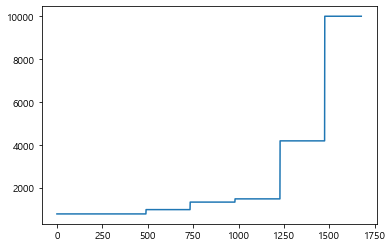

In [25]:
plt.plot(actual_div_growth_list)
plt.show()

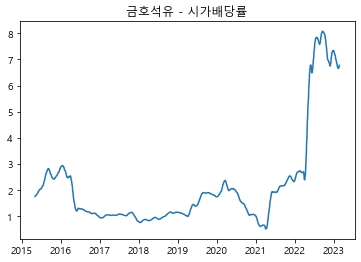

In [30]:
div_yields = savgol_filter(df_f.DIV, 51, 3)

plt.title(f'{name} - 시가배당률')
plt.plot(df_f.index.to_list(), div_yields)
plt.show()

In [27]:
df_p = stock.get_market_ohlcv(start_date, end_date, code)
df_p

,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2015-05-04,85900,86000,84700,85600,67092,5718560400,-0.70
2015-05-06,86000,86400,84500,85700,85740,7289917400,0.12
2015-05-07,85300,85500,83000,84300,139105,11670443800,-1.63
2015-05-08,84200,84200,82700,83900,59180,4937647300,-0.47
2015-05-11,84300,86000,84300,84800,72070,6145163200,1.07
...,...,...,...,...,...,...,...
2023-02-16,142000,143000,140400,142000,67487,9556429400,0.00
2023-02-17,140700,146500,140600,144900,75219,10874398900,2.04
2023-02-20,144800,154800,144100,154400,246343,37326553800,6.56


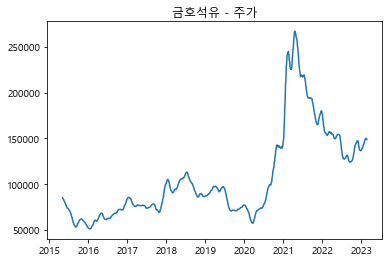

In [31]:
close_prices = savgol_filter(df_p.종가, 51, 3)

plt.title(f'{name} - 주가')
plt.plot(df_f.index.to_list(), close_prices)
plt.show()

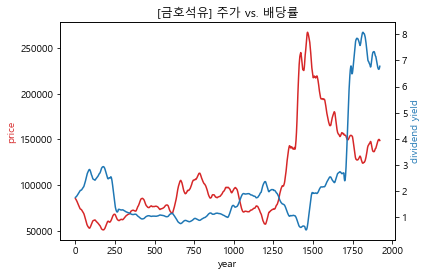

In [32]:
"""
주가 배당률 그리기
"""
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('price', color=color)
ax1.plot(close_prices, color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('dividend yield', color=color)
ax2.plot(div_yields, color=color)
plt.title(f'[{name}] 주가 vs. 배당률')
plt.show()

In [33]:
np.corrcoef(div_yields, close_prices)

array([[1.        , 0.17895288],
       [0.17895288, 1.        ]])

"""
매수점수 계산
"""

In [38]:
df_cur_f = stock.get_market_fundamental('20230222', '20230222', code)
df_cur_f

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2023-02-22,181037,2.26,0.88,70433,6.29,10000


In [39]:
cur_div = df_cur_f.DIV[0]
cur_div

6.29

In [40]:
def get_percentage(input, min, max):
    return round((input - min) / (max - min) * 100)

def calculate_buy_score(current_div_yield, div_min, div_max):
    buy_score = get_percentage(current_div_yield, div_min, div_max)
    return buy_score

In [41]:
calculate_buy_score(cur_div, min(div_yields), max(div_yields))

76

In [46]:
min(df_f.DIV)

0.5299999713897705

In [ ]:
div_min = 
div_min

In [44]:
df_cur_f.DPS[0]

10000

In [42]:
target_price = df_cur_f.DPS[0]/min(df_f.DIV) * 100
target_price

1886792.5546822036

In [45]:
"""역산"""
df_cur_f.DPS[0]/target_price

0.005299999713897705

In [43]:
buy_price = df_cur_f.DPS[0]/max(df_f.DIV) * 100
buy_price

112485.93491350046

In [ ]:
calculate_buy_score(df_cur_f.DIV[0], div_min, div_max)

"""
로우 패스 필터
"""

In [ ]:
div_yields = savgol_filter(df_f.DIV, 51, 3)

In [ ]:
min(div_yields)

In [ ]:
"""
주가 배당률 그리기
"""
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('year')
ax1.set_ylabel('price', color=color)
ax1.plot(df_p['종가'], color=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('dividend yield', color=color)
ax2.plot(df_f['DIV'], color=color)
plt.show()

In [ ]:
df_cur_f = stock.get_market_fundamental('20230214', '20230214', code)
df_cur_f

In [ ]:
df_cur_p = stock.get_market_ohlcv('20230214', '20230214', code)
df_cur_p

In [ ]:
cur_price = df_cur_p.종가[0]
cur_price

In [ ]:
div_min = min(div_yields)
div_min

In [ ]:
div_max = max(div_yields)
div_max

In [ ]:
cur_dps = df_cur_f.DPS[0]
cur_dps

In [ ]:
target_price = cur_dps/div_min * 100
target_price

In [ ]:
buy_price = cur_div/div_max * 100
buy_price

In [ ]:
calculate_buy_score(df_cur_f.DIV[0], div_min, div_max)

In [ ]:
day = stock.get_nearest_business_day_in_a_week('20220610')
day

In [ ]:
"""
분석 기간
"""
start_year = '2012'
end_year = '2021'

"""
NH 투자증권
"""
code = '005940'


In [ ]:
"""
매년 5월 31에 제일 가까운 영업일의 배당금 가져 오기
"""
dps_list = []
for year in range(int(start_year)+1, int(end_year)+2):
    #print(year)
    last_business_day_of_may = stock.get_nearest_business_day_in_a_week(str(year)+'0531')
    print(last_business_day_of_may)
    df_annual_f = stock.get_market_fundamental(last_business_day_of_may, last_business_day_of_may, code)
    display(df_annual_f)
    dps_list.append(df_annual_f.DPS.values[0])
    time.sleep(1)

In [ ]:
dps_list

In [ ]:
def getAnnualDPS(start_year, end_year):
    dps_list = []
    for year in range(int(start_year)+1, int(end_year)+2):
        #print(year)
        last_business_day_of_may = stock.get_nearest_business_day_in_a_week(str(year)+'0531')
        #print(last_business_day_of_may)
        df_annual_f = stock.get_market_fundamental(last_business_day_of_may, last_business_day_of_may, code)
        #display(df_annual_f)
        dps_list.append(df_annual_f.DPS.values[0])
        time.sleep(1)
    return dps_list

In [ ]:
annual_dps_list = getAnnualDPS(start_year, end_year)
annual_dps_list

In [ ]:
years = range(int(start_year), int(end_year)+1)
years

In [ ]:
plt.bar(years, annual_dps_list)
plt.show()

In [ ]:
def getActualDivGrowth(divs):
    div_history = divs.copy()
    div_history.reverse()
    div_growth_list = []
    for div_cur, div_before in zip(div_history, div_history[1:]):
        print(f'div_cur = {div_cur}, div_before = {div_before}')
        if div_before == 0:
            #print('div_before is 0')
            break;

        if div_cur >= div_before:
            div_growth_list.append(div_cur)
        else:
            #print('div_before is more than div cur')
            div_growth_list.append(div_cur)            
            break

    div_growth_list.reverse()
    return len(div_growth_list) - 1, div_growth_list

In [ ]:
actual_div_growth_cnt, actual_div_growth_list = getActualDivGrowth(dps_list)
actual_div_growth_cnt, actual_div_growth_list

In [ ]:
getCAGR(actual_div_growth_list)